In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import holidays


import warnings
warnings.filterwarnings("ignore")

In [9]:
rides_path = "datasets\\uber-lyft-cab-prices\\versions\\4\\cab_rides.csv"
weather_path  = "datasets\\uber-lyft-cab-prices\\versions\\4\\weather.csv"

In [10]:
rides = pd.read_csv(rides_path)
weather = pd.read_csv(weather_path)

In [11]:
print("---- Rides Head ----")
display(rides.head())

---- Rides Head ----


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [12]:
print("---- Weather Head ----")
display(weather.head())

---- Weather Head ----


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [13]:
print("Rides shape:", rides.shape)
print("Weather shape:", weather.shape)

Rides shape: (693071, 10)
Weather shape: (6276, 8)


In [14]:
print("---- Rides Info ----")
rides.info()

---- Rides Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [15]:
print("---- Weather Info ----")
weather.info()

---- Weather Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [16]:
rides['time_stamp'] = pd.to_datetime(rides['time_stamp'], unit='ms')
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')

rides['hour'] = rides['time_stamp'].dt.hour
rides['date'] = rides['time_stamp'].dt.date
weather['hour'] = weather['time_stamp'].dt.hour
weather['date'] = weather['time_stamp'].dt.date


In [17]:
display(rides[['time_stamp','hour','date']].head())
display(weather[['time_stamp','hour','date']].head())

,time_stamp,hour,date
0,2018-12-16 09:30:07.890,9,2018-12-16
1,2018-11-27 02:00:23.677,2,2018-11-27
2,2018-11-28 01:00:22.198,1,2018-11-28
3,2018-11-30 04:53:02.749,4,2018-11-30
4,2018-11-29 03:49:20.223,3,2018-11-29


,time_stamp,hour,date
0,2018-12-16 23:45:01,23,2018-12-16
1,2018-12-16 23:45:01,23,2018-12-16
2,2018-12-16 23:45:01,23,2018-12-16
3,2018-12-16 23:45:01,23,2018-12-16
4,2018-12-16 23:45:01,23,2018-12-16


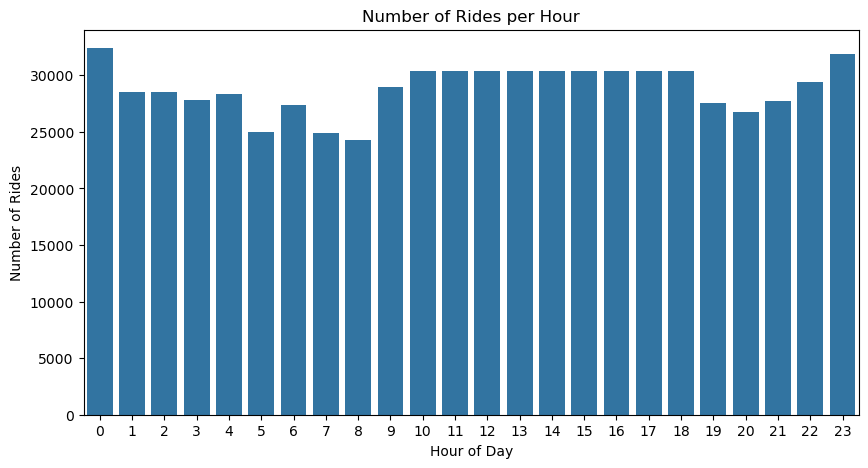

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=rides)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

In [19]:
print("Missing values in rides:\n", rides.isna().sum())
print("Missing values in weather:\n", weather.isna().sum())
print('---'*20)
print("Duplicates in rides:", rides.duplicated().sum())
print("Duplicates in weather:", weather.duplicated().sum())

Missing values in rides:
 distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
hour                    0
date                    0
dtype: int64
Missing values in weather:
 temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
hour             0
date             0
dtype: int64
------------------------------------------------------------
Duplicates in rides: 0
Duplicates in weather: 0


In [20]:
rides.drop_duplicates(inplace=True)
rides.dropna(inplace=True)

In [21]:
print("Missing values in rides:\n", rides.isna().sum())
print("Missing values in weather:\n", weather.isna().sum())

Missing values in rides:
 distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
hour                0
date                0
dtype: int64
Missing values in weather:
 temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
hour             0
date             0
dtype: int64


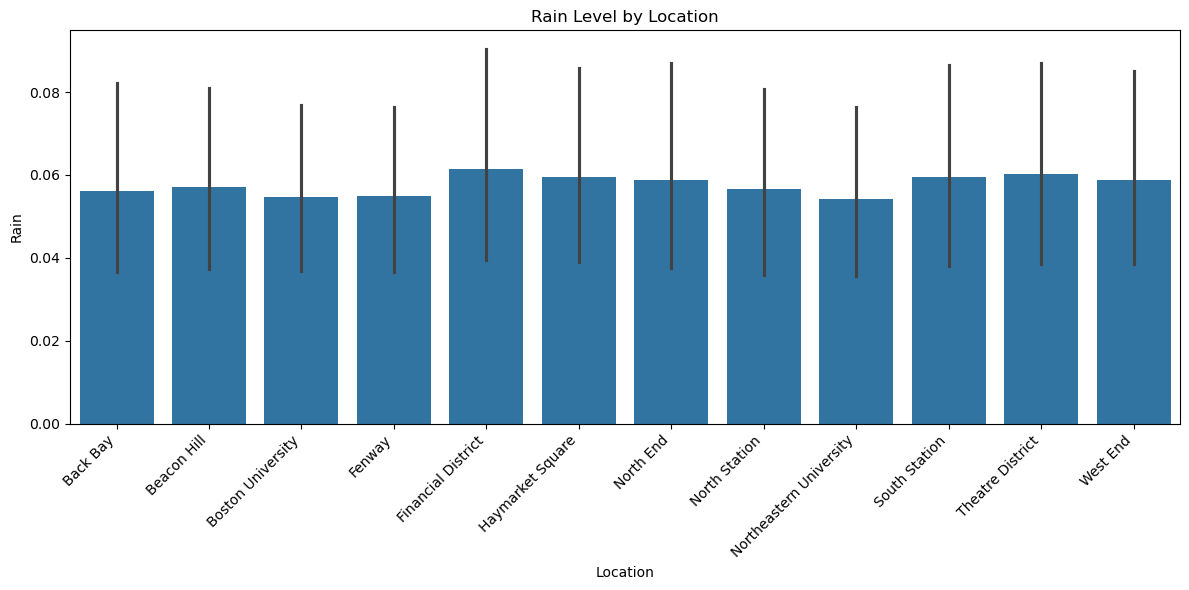

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rain', data=weather)
plt.xticks(rotation=45, ha='right')
plt.title('Rain Level by Location')
plt.xlabel('Location')
plt.ylabel('Rain')
plt.tight_layout()
plt.show()

In [23]:
weather['rain'].value_counts()

rain
0.0030    85
0.0020    51
0.0040    23
0.0060    17
0.0050    15
          ..
0.1846     1
0.1089     1
0.0373     1
0.0340     1
0.0400     1
Name: count, Length: 437, dtype: int64

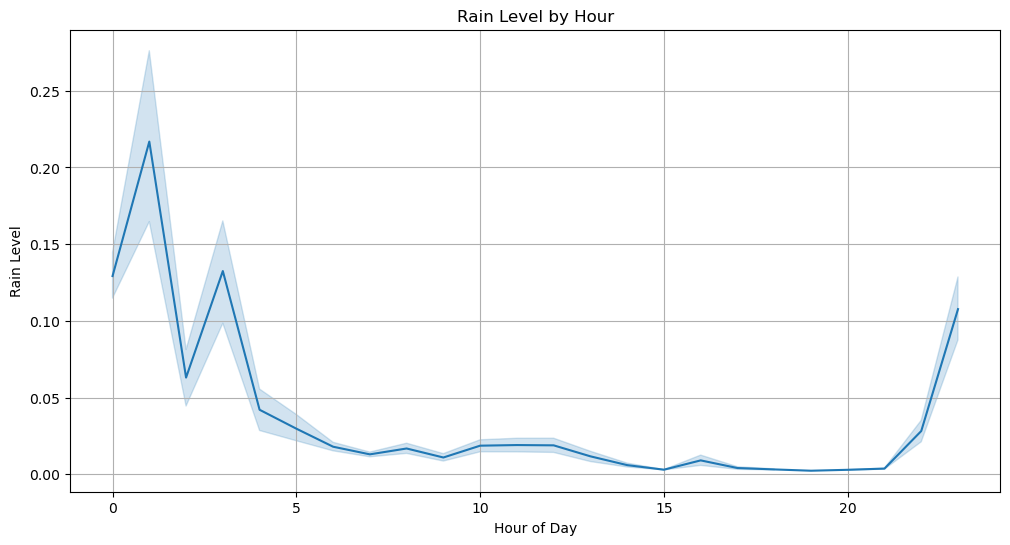

In [24]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='rain', data=weather)
plt.title("Rain Level by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Rain Level")
plt.grid(True)
plt.show()

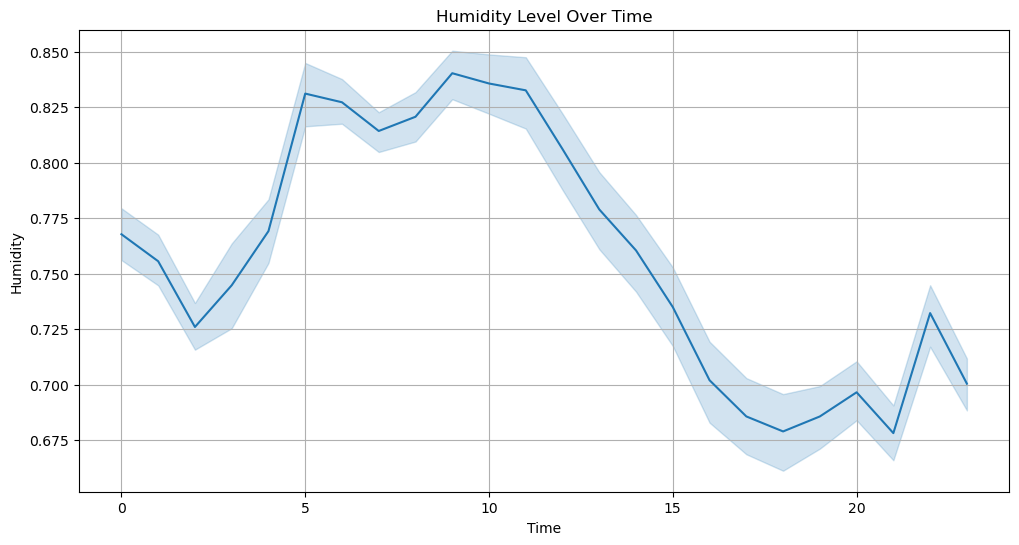

In [25]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='humidity', data=weather)
plt.title("Humidity Level Over Time")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

In [26]:
weather['rain'] = weather.groupby('hour')['rain'].transform(lambda x: x.fillna(x.mean()))


In [27]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        6276 non-null   float64       
 1   location    6276 non-null   object        
 2   clouds      6276 non-null   float64       
 3   pressure    6276 non-null   float64       
 4   rain        6276 non-null   float64       
 5   time_stamp  6276 non-null   datetime64[ns]
 6   humidity    6276 non-null   float64       
 7   wind        6276 non-null   float64       
 8   hour        6276 non-null   int32         
 9   date        6276 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(1), object(2)
memory usage: 465.9+ KB


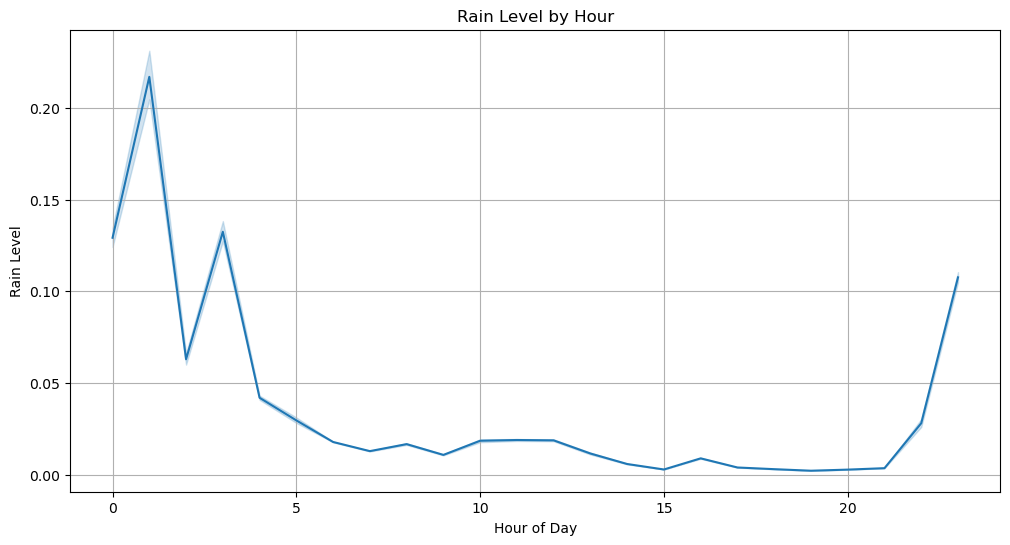

In [28]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='rain', data=weather)
plt.title("Rain Level by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Rain Level")
plt.grid(True)
plt.show()

In [29]:
print("Weather missing before:\n", weather.isna().sum())


Weather missing before:
 temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
hour          0
date          0
dtype: int64


In [30]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,hour,date
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,9,2018-12-16
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2,2018-11-27
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1,2018-11-28
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,4,2018-11-30
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,3,2018-11-29


In [31]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,hour,date
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,23,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,23,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07,23,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09,23,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49,23,2018-12-16


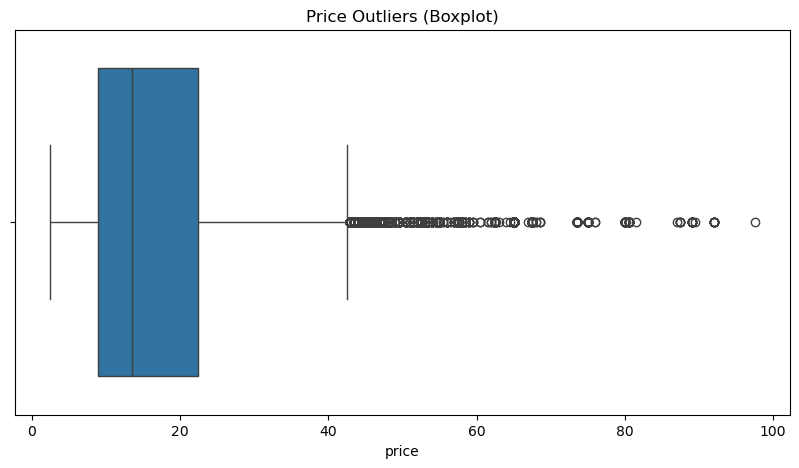

In [32]:

plt.figure(figsize=(10,5))
sns.boxplot(x=rides['price'])
plt.title("Price Outliers (Boxplot)")
plt.show()


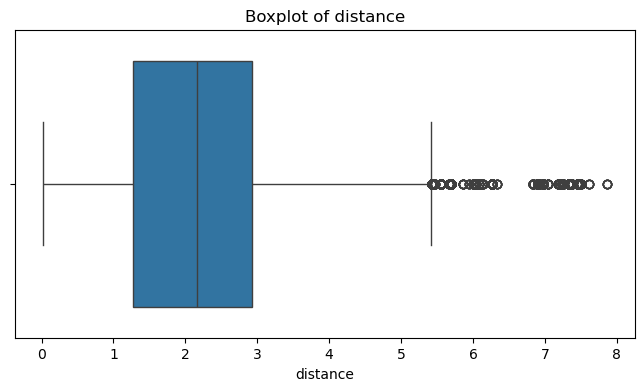

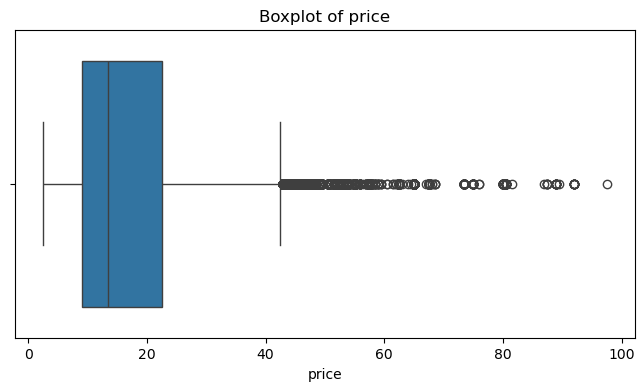

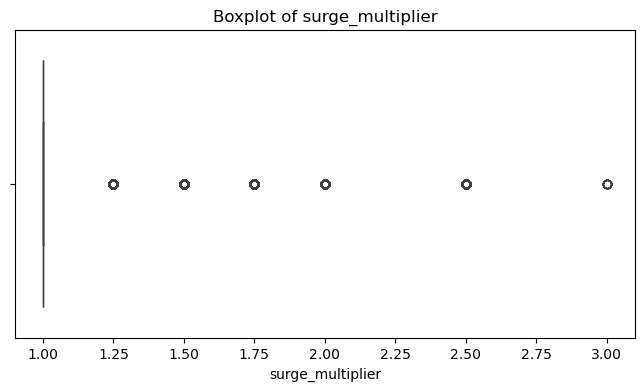

In [33]:
numeric_cols = rides.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=rides[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [34]:
rides.surge_multiplier.value_counts()

surge_multiplier
1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

In [35]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  hour              637976 non-null  int32         
 11  date              637976 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(7)
memory usage: 60.8+ MB


In [36]:
rides = rides[rides['price'] > 0]         
rides = rides[rides['price'] < 200]       

rides = rides[rides['distance'] > 0]      

rides = rides[~((rides['distance'] == 0) & (rides['price'] > 0))]


In [37]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  hour              637976 non-null  int32         
 11  date              637976 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(7)
memory usage: 60.8+ MB


In [38]:
rides.shape

(637976, 12)

<Axes: xlabel='surge_multiplier', ylabel='count'>

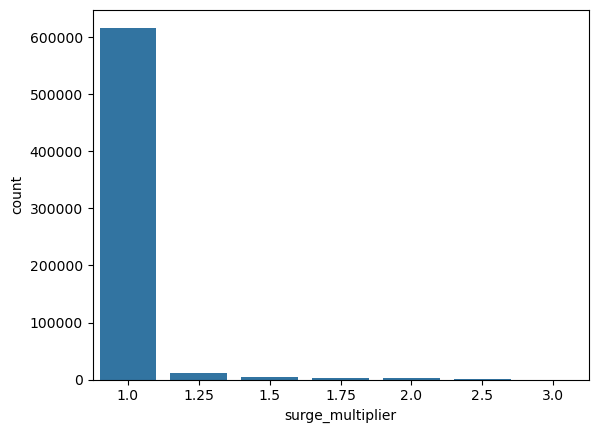

In [39]:
sns.countplot(x='surge_multiplier', data=rides)

In [40]:
rides.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'hour', 'date'],
      dtype='object')


# data summary: shape, column types, missing , basic stats.


In [41]:
rides.describe()

,distance,time_stamp,price,surge_multiplier,hour
count,637976.000000,637976,637976.000000,637976.000000,637976.000000
mean,2.189261,2018-12-05 21:34:05.413373440,16.545125,1.015068,11.618528
min,0.020000,2018-11-26 03:40:46.318000,2.500000,1.000000,0.000000
25%,1.270000,2018-11-28 22:26:08.211000064,9.000000,1.000000,6.000000
50%,2.160000,2018-12-02 07:52:59.568000,13.500000,1.000000,12.000000
75%,2.930000,2018-12-14 22:45:04.678000128,22.500000,1.000000,18.000000
max,7.860000,2018-12-18 19:15:10.943000,97.500000,3.000000,23.000000
std,1.135413,NaN,9.324359,0.095422,6.948776


In [42]:
 weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,hour
count,6276.000000,6276.000000,6276.000000,6276.000000,6276,6276.000000,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.040985,2018-12-03 17:16:17.146430720,0.763985,6.802812,10.583174
min,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.290000,0.000000
25%,36.077500,0.440000,997.747500,0.005955,2018-11-28 06:34:30,0.670000,3.517500,5.000000
50%,40.130000,0.780000,1007.660000,0.017956,2018-11-29 17:52:54,0.760000,6.570000,10.000000
75%,42.832500,0.970000,1018.480000,0.042045,2018-12-13 08:45:01,0.890000,9.920000,17.000000
max,55.410000,1.000000,1035.120000,0.780700,2018-12-18 18:45:02,0.990000,18.180000,23.000000
std,6.022055,0.314284,12.870775,0.062218,NaN,0.127340,3.633466,6.998390


# target distribution, check imbalance

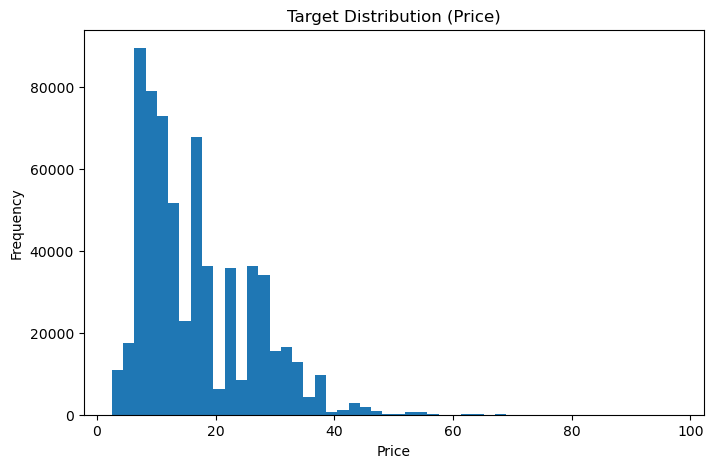

In [43]:
target = "price"

plt.figure(figsize=(8,5))
plt.hist(rides[target].dropna(), bins=50)
plt.title("Target Distribution (Price)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [44]:
print("===== Imbalance Check =====")
print(rides[target].value_counts().head())
print("\nUnique values:", rides[target].nunique())

===== Imbalance Check =====
price
7.0     52314
16.5    44351
10.5    40590
13.5    33707
9.0     30884
Name: count, dtype: int64

Unique values: 147


In [45]:
rides['surge_multiplier'].value_counts().head()

surge_multiplier
1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
Name: count, dtype: int64

# Plot distributions of numerical features (histograms, boxplots).

In [46]:
num_cols = rides.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(num_cols))

Numerical Columns: ['distance', 'price', 'surge_multiplier']


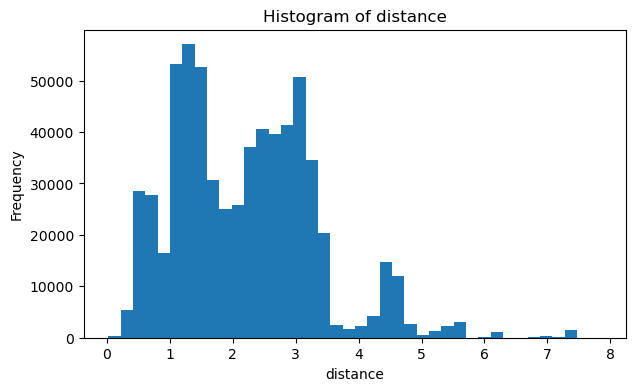

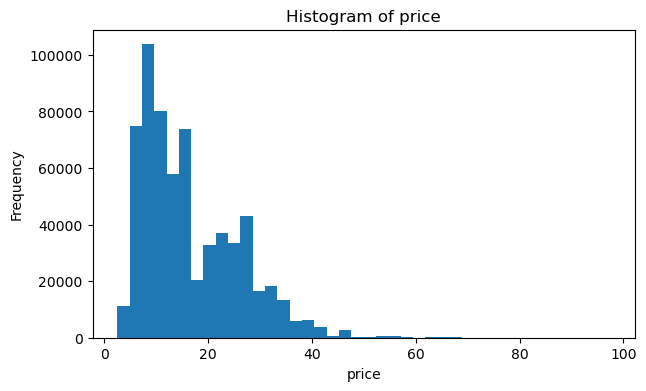

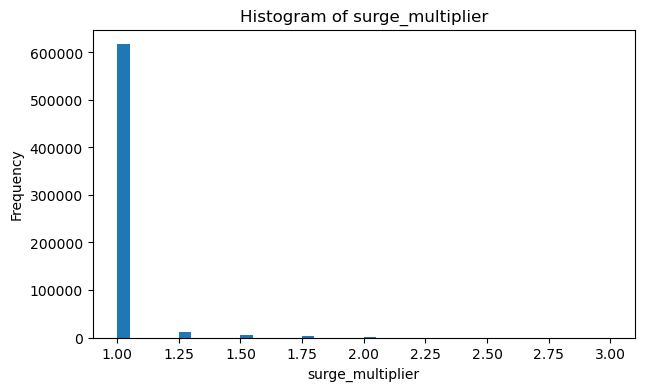

In [47]:
# Plot Histograms
for col in num_cols:
    plt.figure(figsize=(7,4))
    plt.hist(rides[col].dropna(), bins=40)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


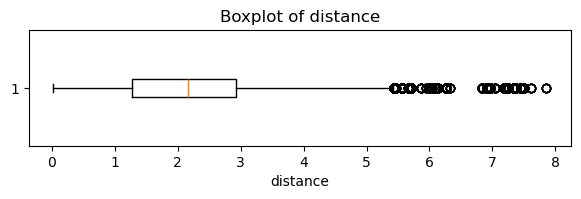

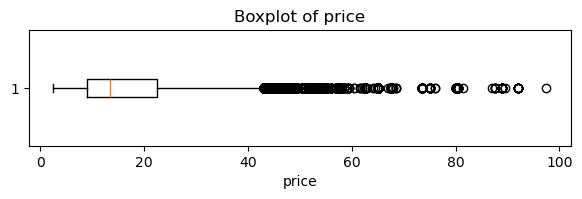

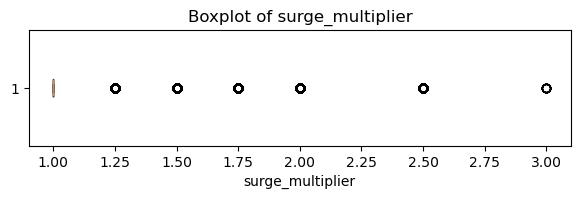

In [48]:
# Plot Boxplots 
for col in num_cols:
    plt.figure(figsize=(7,1.5))
    plt.boxplot(rides[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

# Analyze categorical features (value counts, bar plots)

In [49]:
rides.drop(columns=['id','product_id'], inplace=True)

cat_cols = rides.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(cat_cols))


Categorical Columns: ['cab_type', 'destination', 'source', 'name', 'date']



===== cab_type - Value Counts =====
cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64


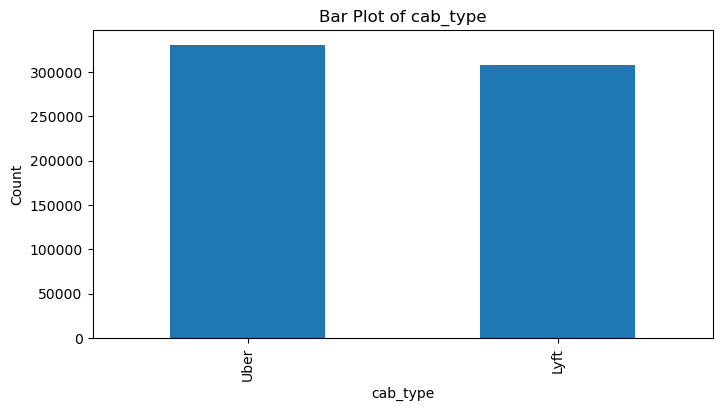


===== destination - Value Counts =====
destination
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: count, dtype: int64


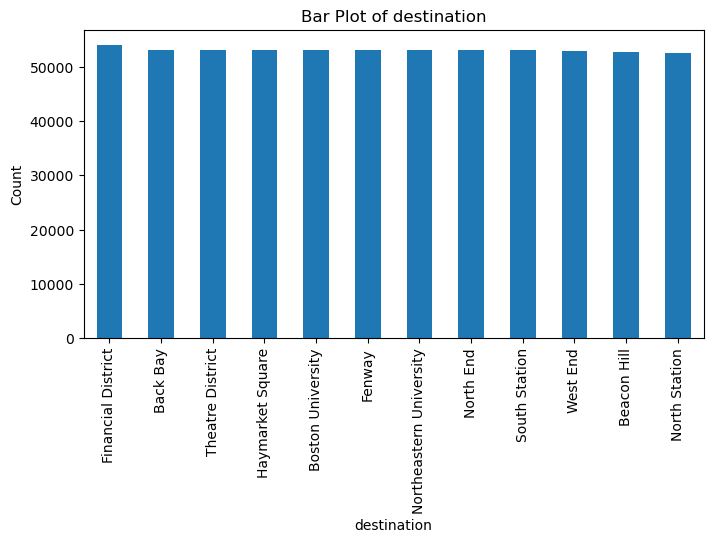


===== source - Value Counts =====
source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64


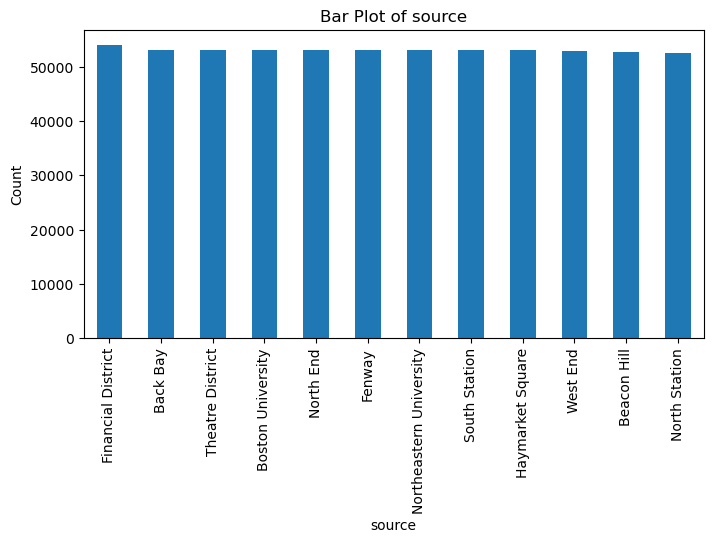


===== name - Value Counts =====
name
WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
UberX           55094
UberPool        55091
Lyft            51235
Lux             51235
Lyft XL         51235
Lux Black XL    51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64


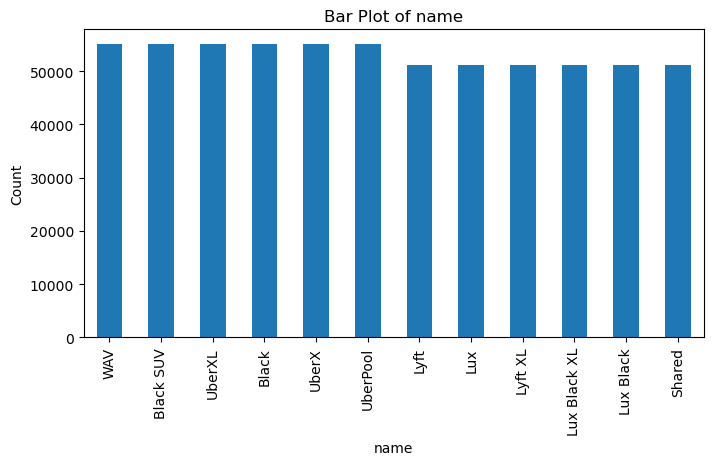


===== date - Value Counts =====
date
2018-11-27    70135
2018-11-28    67842
2018-11-29    55222
2018-12-01    41680
2018-11-30    41544
2018-12-16    41359
2018-12-17    41354
2018-12-14    41344
2018-12-15    41332
2018-12-03    41323
2018-12-02    41298
2018-12-13    35496
2018-12-18    33329
2018-11-26    29028
2018-12-04    11627
2018-12-10     2534
2018-12-09     1529
Name: count, dtype: int64


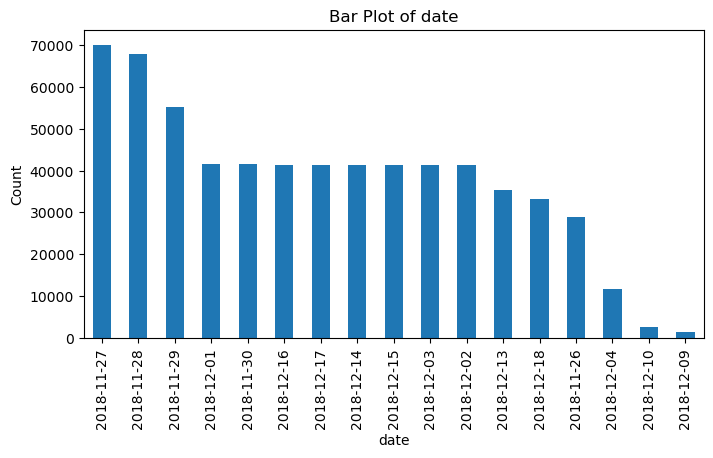

In [50]:
# Value Counts 
for col in cat_cols:
    print(f"\n===== {col} - Value Counts =====")
    print(rides[col].value_counts())
    
    # Bar plot
    plt.figure(figsize=(8,4))
    rides[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [51]:
weather[['location', 'date', 'hour']].duplicated().sum()


np.int64(2316)

In [52]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,hour,date
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,23,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,23,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07,23,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09,23,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49,23,2018-12-16


In [53]:
weather_unique = (
    weather
    .groupby(['location', 'date', 'hour'], as_index=False)
    .agg({
        # عدّل الأعمدة على حسب اللي موجود عندك
        'temp': 'mean',
        'clouds': 'mean',
        'pressure': 'mean',
        'rain': 'mean',
        'humidity': 'mean',
        'wind': 'mean'
    })
)


In [54]:
merged = rides.merge(
    weather_unique,
    left_on=['source', 'date', 'hour'],
    right_on=['location', 'date', 'hour'],
    how='left'
)


In [55]:
merged.drop(columns=['location'], inplace=True)

In [56]:
merged.shape

(637976, 16)

In [57]:
merged.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,hour,date,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,Shared,9,2018-12-16,38.460,0.290000,1022.25,0.010922,0.760000,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,Lux,2,2018-11-27,44.065,0.995000,1002.88,0.106000,0.895000,12.63
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,Lyft,1,2018-11-28,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,4,2018-11-30,35.080,0.000000,1013.71,0.042045,0.700000,5.25
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,Lyft XL,3,2018-11-29,37.680,0.433333,998.42,0.132477,0.706667,11.16


In [58]:
merged.isnull().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price                  0
surge_multiplier       0
name                   0
hour                   0
date                   0
temp                2734
clouds              2734
pressure            2734
rain                2734
humidity            2734
wind                2734
dtype: int64

In [59]:
# ------------------------------

In [60]:
merged.dropna(inplace=True)

In [61]:
merged.duplicated().sum()   

np.int64(71)

In [62]:
merged.drop_duplicates(inplace=True)

In [63]:
merged.dropna(inplace=True)

In [64]:
merged.shape

(635171, 16)

In [65]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635171 entries, 0 to 637975
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635171 non-null  float64       
 1   cab_type          635171 non-null  object        
 2   time_stamp        635171 non-null  datetime64[ns]
 3   destination       635171 non-null  object        
 4   source            635171 non-null  object        
 5   price             635171 non-null  float64       
 6   surge_multiplier  635171 non-null  float64       
 7   name              635171 non-null  object        
 8   hour              635171 non-null  int32         
 9   date              635171 non-null  object        
 10  temp              635171 non-null  float64       
 11  clouds            635171 non-null  float64       
 12  pressure          635171 non-null  float64       
 13  rain              635171 non-null  float64       
 14  humidity 

In [66]:
merged.surge_multiplier.value_counts()

surge_multiplier
1.00    614287
1.25     11042
1.50      5040
1.75      2408
2.00      2228
2.50       154
3.00        12
Name: count, dtype: int64

In [67]:
count=merged.surge_multiplier!= 1.0

In [68]:
nu=count.sum()

In [69]:
surge_1 = merged[merged['surge_multiplier'] == 1.0]

surge_not_1 = merged[merged['surge_multiplier'] != 1.0]

surge_1_sample = surge_1.sample(n=100000-nu, random_state=42)

final_df = pd.concat([surge_1_sample, surge_not_1], ignore_index=True)

print(final_df.shape)
final_df.head()


(100000, 16)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,hour,date,temp,clouds,pressure,rain,humidity,wind
0,1.93,Lyft,2018-12-01 11:17:55.791,Back Bay,Haymarket Square,22.5,1.0,Lux Black,11,2018-12-01,32.580000,0.400000,1022.140000,0.019036,0.79,4.340000
1,1.05,Lyft,2018-11-29 06:53:05.635,North End,North Station,11.0,1.0,Lyft XL,6,2018-11-29,37.738571,0.774286,1000.315714,0.017956,0.70,10.212857
2,1.64,Uber,2018-12-16 22:30:08.069,Back Bay,Northeastern University,8.5,1.0,UberX,22,2018-12-16,41.860000,0.900000,1012.430000,0.101100,0.78,11.040000
3,2.53,Lyft,2018-12-02 06:08:03.130,Northeastern University,Beacon Hill,22.5,1.0,Lux Black,6,2018-12-02,38.380000,1.000000,1020.700000,0.017956,0.83,2.750000
4,1.71,Lyft,2018-12-16 00:40:15.848,South Station,West End,5.0,1.0,Shared,0,2018-12-16,42.690000,0.170000,1023.050000,0.129213,0.71,6.390000


In [70]:
merged.shape

(635171, 16)

In [72]:
final_df.to_csv('datasets\merged_rides_weather\merged_rides_weather(100000).csv', index=False)
merged.to_csv('datasets\merged_rides_weather\merged_rides_weather(635171).csv', index=False)
